<a href="https://colab.research.google.com/github/twumasimb/Exploratory-Data-Analysis/blob/main/EDA_final_Twumasi_Mensah_Boateng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('/content/sample_data/Texas_2015_District_Snapshot2 - Texas_2015_District_Snapshot2.csv') # Importing the dataset

# data = data.dropna()

In [3]:
# Population statistics
data.describe()

,SIMPLE_PROB_WEIGHT,DISTRICT_NUMBER,year,NCES.District.ID,conum_ansi_ccdlea,sch_ccdlea,member_ccdlea,lzip_ccdlea,lzip4_ccdlea,metmic_ccdlea,...,Fine_Arts,Wellness_PE,Community_Parent_involvement,workforce_readiness,ESL_programs,Digital_learning_environment,Dropout_prevention_strategies,GT,Statutory_compliance,Mean_rating
count,1020.000000,1020.000000,1020.0,1.020000e+03,1020.000000,1020.000000,1020.000000,1020.000000,904.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,995.000000,996.000000,1016.000000,1013.000000,1013.000000,1020.000000,1020.000000
mean,0.000980,125654.538235,2015.0,4.826759e+06,48248.294118,8.500980,4902.323529,77332.103922,2383.420354,0.857843,...,3.268627,3.392157,3.317647,3.134673,3.024096,3.207677,3.343534,2.949654,0.994118,3.204280
std,0.002764,72571.388037,0.0,1.185928e+04,144.894438,18.213837,13895.192494,1444.627289,2790.892248,0.703550,...,0.689467,0.669786,0.689955,0.716262,0.728060,0.692806,0.689023,0.756025,0.076508,0.539454
min,0.000004,1902.000000,2015.0,4.800001e+06,48001.000000,1.000000,9.000000,73949.000000,1.000000,0.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.750000
25%,0.000076,63905.250000,2015.0,4.816838e+06,48128.500000,2.000000,383.750000,76035.250000,266.500000,0.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.875000
50%,0.000192,117905.500000,2015.0,4.826355e+06,48234.000000,4.000000,979.000000,77350.500000,1059.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.250000
75%,0.000614,184903.250000,2015.0,4.836938e+06,48367.000000,6.000000,3062.000000,78597.500000,3599.250000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,3.625000
max,0.042734,254902.000000,2015.0,4.899130e+06,48507.000000,288.000000,215225.000000,79932.000000,9998.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000


> # **Question 1**




In [4]:
#randomly selecting 100 datapoints

# random.seed(20)   # Get the same results everytime

first_sample = data.sample(n=100, random_state=20)


In [5]:
#peeping at sampled data
first_sample.describe()

,SIMPLE_PROB_WEIGHT,DISTRICT_NUMBER,year,NCES.District.ID,conum_ansi_ccdlea,sch_ccdlea,member_ccdlea,lzip_ccdlea,lzip4_ccdlea,metmic_ccdlea,...,Fine_Arts,Wellness_PE,Community_Parent_involvement,workforce_readiness,ESL_programs,Digital_learning_environment,Dropout_prevention_strategies,GT,Statutory_compliance,Mean_rating
count,100.000000,100.000000,100.0,1.000000e+02,100.000000,100.000000,100.000000,100.000000,88.000000,100.00000,...,100.000000,100.000000,100.000000,96.000000,95.000000,99.000000,99.000000,100.000000,100.00,100.000000
mean,0.000661,126634.870000,2015.0,4.826801e+06,48250.460000,6.250000,3304.470000,77175.670000,2579.443182,0.95000,...,3.220000,3.340000,3.240000,3.125000,2.926316,3.181818,3.282828,2.850000,0.99,3.147012
std,0.001418,68294.876575,0.0,1.182353e+04,136.590475,9.314239,7152.266225,1498.343018,2917.424903,0.74366,...,0.675397,0.727803,0.698049,0.684413,0.732848,0.705136,0.655283,0.770347,0.10,0.497937
min,0.000009,1907.000000,2015.0,4.800002e+06,48001.000000,1.000000,42.000000,75006.000000,7.000000,0.00000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.00,2.000000
25%,0.000060,72908.000000,2015.0,4.817442e+06,48143.000000,2.000000,307.250000,75846.750000,358.250000,0.00000,...,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.00,2.875000
50%,0.000193,121908.500000,2015.0,4.827315e+06,48241.000000,3.000000,988.500000,76752.000000,1163.500000,1.00000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.00,3.000000
75%,0.000576,178905.000000,2015.0,4.835895e+06,48355.000000,6.000000,2914.500000,78542.500000,4367.750000,1.25000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,1.00,3.525000
max,0.009361,249901.000000,2015.0,4.846170e+06,48497.000000,61.000000,47202.000000,79789.000000,9801.000000,2.00000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.00,4.000000


**Making Statistical Claims**



1.   50% of the ISDs have a student to teacher ratio above 12
2.   The mean student to teacher ratio is at least 12.50



1. ***Sample Proportion***

H0: p = 0.5\
H0: p > 0.5

In [6]:
# Count number of ISD with ptr > 12
x1_select = (first_sample.ptr > 12).sum().sum()
first_sample_size = first_sample.ptr.size
p_hat_1 = x1_select / first_sample_size

print(f"The proportion of students with Student to teacher ratio greater than 12 is: {p_hat_1}")

The proportion of students with Student to teacher ratio greater than 12 is: 0.59


In [7]:
# set the sample size and number of successes
n = first_sample_size
p = 0.5
x = x1_select
alpha = 0.05


# z-value for 95% confidence level
z = 1.96

#proportions
p_hat = p_hat_1
q_hat = 1 - p_hat

# calculate the population proportion
pop_prop = p

# calculate the standard error
se = np.sqrt((pop_prop * (1 - pop_prop)) / n)

# calculate the z-score
z_score = (p_hat_1 - pop_prop) / se

# calculate the p-value (for two tailed multiply by a factor of 2)
p_value = 1 - norm.cdf(abs(z_score))

# print the results
print('z-score:', z_score)
print('p-value:', p_value)

# Printing the Conclusion from the hypothesis
if(p_value < alpha):
  print("We reject the null hypothesis\n")
else:
  print("We fail to reject the null hypothesis\n")

"""
Computing the Confidence Interval
"""

# Error 
E = z*(np.sqrt((p_hat*q_hat)/n))

# Printing the CI 
lower_bound = p_hat - E
upper_bound = p_hat + E

print(f"CI: ({lower_bound}, {upper_bound})")
print(f"We are 95% confident that the proportion of ISD with student to teacher\
       \nratio above 12 falls within the confidence interval of\
       {lower_bound} and {upper_bound}")


z-score: 1.7999999999999994
p-value: 0.03593031911292588
We reject the null hypothesis

CI: (0.4936006722015137, 0.6863993277984862)
We are 95% confident that the proportion of ISD with student to teacher       
ratio above 12 falls within the confidence interval of       0.4936006722015137 and 0.6863993277984862


2. ***Sample Mean***

H0: mean = 12.50\
H1: mean > 12.50

In [29]:
data.ptr.mean()

12.724379687843138

In [9]:
# set the population mean and standard deviation
pop_mean = data.ptr.mean()
pop_std = data.ptr.std()
n = first_sample_size
sample_mean = first_sample.ptr.mean()
alpha = 0.05 # For 95% confidence level
z = 1.96 # z-value for 95% confidence level

# calculate the z-score
z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))

# calculate the p-value (The value is left tailed)
p_value = (1 - norm.cdf(abs(z_score)))

# print the results
print('z-score:', z_score)
print('p-value:', p_value)

# Printing the Conclusion from the hypothesis
if(p_value < alpha):
  print("We reject the null hypothesis\n")
else:
  print("We fail to reject the null hypothesis\n")

"""
Computing the Confidence Interval
"""

# Error 
E = z*(pop_std/np.sqrt(n))

# Printing the CI 
lower_bound = sample_mean - E
upper_bound = sample_mean + E

print(f"CI: ({lower_bound}, {upper_bound})")
print(f"We are 95% confident that the number of ISD with mean student to teacher\
       \nratio above 12 falls within the confidence interval of\
       {lower_bound} and {upper_bound}")

z-score: 0.23119447123779258
p-value: 0.4085818624910994
We fail to reject the null hypothesis

CI: (12.293332809347948, 13.270715016652051)
We are 95% confident that the number of ISD with mean student to teacher       
ratio above 12 falls within the confidence interval of       12.293332809347948 and 13.270715016652051


> # **Question 2**

In [10]:
# randomly selecting 200 datapoints
sec_sample = data.sample(n=200, random_state=5)

In [11]:
sec_sample.describe()

,SIMPLE_PROB_WEIGHT,DISTRICT_NUMBER,year,NCES.District.ID,conum_ansi_ccdlea,sch_ccdlea,member_ccdlea,lzip_ccdlea,lzip4_ccdlea,metmic_ccdlea,...,Fine_Arts,Wellness_PE,Community_Parent_involvement,workforce_readiness,ESL_programs,Digital_learning_environment,Dropout_prevention_strategies,GT,Statutory_compliance,Mean_rating
count,200.000000,200.000000,200.0,2.000000e+02,200.000000,200.000000,200.000000,200.000000,177.000000,200.000000,...,200.000000,200.000000,200.000000,193.000000,195.000000,199.000000,198.000000,198.000000,200.0,200.000000
mean,0.001029,118925.590000,2015.0,4.826902e+06,48236.080000,8.445000,5138.255000,77382.705000,2319.751412,0.850000,...,3.280000,3.380000,3.275000,3.082902,2.979487,3.135678,3.323232,2.929293,1.0,3.169286
std,0.002476,70085.773619,0.0,1.269343e+04,139.196378,13.775551,12415.943641,1477.701967,2861.547342,0.707107,...,0.724031,0.698599,0.694107,0.694748,0.752720,0.743105,0.710019,0.757400,0.0,0.530623
min,0.000015,1906.000000,2015.0,4.800003e+06,48001.000000,1.000000,87.000000,75002.000000,7.000000,0.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.0,2.000000
25%,0.000072,61904.750000,2015.0,4.816942e+06,48121.000000,2.000000,353.000000,76049.500000,249.000000,0.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.0,2.875000
50%,0.000214,108911.500000,2015.0,4.827045e+06,48215.000000,4.000000,1066.500000,77406.000000,851.000000,1.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.0,3.250000
75%,0.000676,175406.750000,2015.0,4.836052e+06,48348.000000,7.000000,3264.750000,78637.250000,3912.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.0,3.500000
max,0.022538,252903.000000,2015.0,4.899130e+06,48503.000000,86.000000,113023.000000,79928.000000,9802.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0,4.000000


***Hypothesis Testing***
1. **Proportions**\
The proportion of ISDs with ptr > 12

H0: p_hat_1 = p_hat_2\
H1: p_hat_1 != p_hat_2

In [12]:
# Count number of ISD with ptr > 12
x2_select = (sec_sample.ptr > 12).sum().sum()
sec_sample_size = sec_sample.ptr.size # Size of sample
p_hat_2 = x2_select/sec_sample_size # Calculate the proportion of selected samples
print("Selected from X1: ", x1_select)
print("Selected from X2: ", x2_select)
print(f"The proportion of students with Student to teacher ratio greater than 12 is: {p_hat_2}")

Selected from X1:  59
Selected from X2:  119
The proportion of students with Student to teacher ratio greater than 12 is: 0.595


In [13]:
x1 = x1_select
x2 = x2_select
n1 = first_sample_size
n2 = sec_sample_size
alpha = 0.05

p_bar = (x1+x2)/(n1+n2)
q_bar = 1 - p_bar

print("p_bar: ",p_bar)
print("q_bar: ",q_bar)

p_hat_1 = p_hat_1
p_hat_2 = p_hat_2
q_hat_1 = 1 - p_hat_1
q_hat_2 = 1 - p_hat_2

print("p_hat_1: ",p_hat_1)
print("p_hat_2: ",p_hat_2)
print("q_hat_1: ",q_hat_1)
print("q_hat_2: ",q_hat_2)

# Compute the Z-score
z_score = (p_hat_1 - p_hat_2)/np.sqrt(((p_bar*q_bar)/n1)+((p_bar*q_bar)/n2))

# calculate the p-value (multiplying with 2 because it is two tailed)
p_value = 2*(1 - norm.cdf(abs(z_score)))

# print the results
print('z-score:', z_score)
print('p-value:', p_value)

# Printing the Conclusion from the hypothesis
if(p_value < alpha):
  print("We reject the null hypothesis\n")
else:
  print("We fail to reject the null hypothesis\n")

"""
Computing the Confidence Interval
"""

# Computing the confidence interval(confidence of 95%, z_value = 1.96)
z_value = 1.96
Error = z_value*(np.sqrt(((p_hat_1*q_hat_1)/n1) + (p_hat_2*q_hat_2)/n2))

# Printing the CI 
lower_bound = (p_hat_1 - p_hat_2) - Error
upper_bound = (p_hat_1 - p_hat_2) + Error

print(f"CI: ({lower_bound}, {upper_bound})")

print(f"We are 95% confident that the number of ISD with mean student to teacher\
       \nratio above 12 falls within the confidence interval of\
       {lower_bound} and {upper_bound}")

p_bar:  0.5933333333333334
q_bar:  0.4066666666666666
p_hat_1:  0.59
p_hat_2:  0.595
q_hat_1:  0.41000000000000003
q_hat_2:  0.405
z-score: -0.08311046516403732
p-value: 0.9337637046397333
We fail to reject the null hypothesis

CI: (-0.12298931392291423, 0.11298931392291423)
We are 95% confident that the number of ISD with mean student to teacher       
ratio above 12 falls within the confidence interval of       -0.12298931392291423 and 0.11298931392291423


***Hypothesis Testing: Mean Samples***



In [14]:
print(f"The mean for sample 100 is : {first_sample.ptr.mean()}")
print(f"The mean for sample 200 is : {sec_sample.ptr.mean()}")

The mean for sample 100 is : 12.782023913
The mean for sample 200 is : 12.726438213000002


In [15]:
from scipy.stats import t

x_bar_1 = first_sample.ptr.mean()
x_bar_2 = sec_sample.ptr.mean()
n1 = first_sample_size
n2 = sec_sample_size

alpha = 0.05 # Confidence level of 95%
t_val = 1.980 # t_value at confidence of 95% @df = 120 for two tailed

std_1 = first_sample.ptr.std()
std_2 = sec_sample.ptr.std()

p_bar = (x1+x2)/(n1+n2)
q_bar = 1 - p_bar

print("p_bar: ",p_bar)
print("q_bar: ",q_bar)

p_hat_1 = p_hat_1
p_hat_2 = p_hat_2
q_hat_1 = 1 - p_hat_1
q_hat_2 = 1 - p_hat_2

print("p_hat_1: ",p_hat_1)
print("p_hat_2: ",p_hat_2)
print("q_hat_1: ",q_hat_1)
print("q_hat_2: ",q_hat_2)

# Calculate the t-value
t_value = (x_bar_1 - x_bar_2) / (np.sqrt((std_1**2)/n1 + (std_2**2)/n2))

# degrees of freedom
df = n1 + n2 - 2 
print("df", df)

# two-tailed test and p-value
p_value = 2 * t.cdf(-np.abs(t_value), df)  

print("t-value: {:.5f}".format(t_value))
print("p-value: {:.5f}".format(p_value))

# Printing the Conclusion from the hypothesis
if(p_value < alpha):
  print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

"""
Computing the Confidence Interval
"""

# Calculate the pooled standard deviation
s_pooled = np.sqrt(((n1-1)*std_1**2 + (n2-1)*std_2**2) / (n1+n2-2))

Error = t_val*(s_pooled * np.sqrt(1/n1 + 1/n2))
print("Error margin:", Error)

# Printing the CI 
lower_bound = (x_bar_1 - x_bar_2) - Error
upper_bound = (x_bar_1 - x_bar_2) + Error

print(f"CI: ({lower_bound}, {upper_bound})")
print(f"We are 95% confident that the number of ISD with mean student to teacher\
       \nratio above 12 falls within the confidence interval of\
       {lower_bound} and {upper_bound}")

p_bar:  0.5933333333333334
q_bar:  0.4066666666666666
p_hat_1:  0.59
p_hat_2:  0.595
q_hat_1:  0.41000000000000003
q_hat_2:  0.405
df 298
t-value: 0.18664
p-value: 0.85207
We fail to reject the null hypothesis
Error margin: 0.600414687634144
CI: (-0.5448289876341458, 0.6560003876341421)
We are 95% confident that the number of ISD with mean student to teacher       
ratio above 12 falls within the confidence interval of       -0.5448289876341458 and 0.6560003876341421


> # **Question 3**

Correlation r

In [26]:
# Using Numpy
import numpy as np
from scipy.stats import pearsonr

# Calculate the correlation coefficient
r = np.corrcoef(data.ptr, data.Mean_rating)[0,1]

corr_coef, p_value = pearsonr(data.ptr, data.Mean_rating)

print("Correlation coefficient: ", (corr_coef))

if(corr_coef < 0.95):
  print(f"There is a weak correlation of {corr_coef} between the two variales")
else:
  print(f"There is a strong correlation of {corr_coef} between the two variables")


Correlation coefficient:  0.12733428449839163
There is a weak correlation of 0.12733428449839163 between the two variales




# **Question 4** 
Finding the Linear Equation


In [17]:
r = corr_coef
Sy = data.Mean_rating.std()
Sx = data.ptr.std()
b1 = r*(Sy/Sx)

print(f"The value for b1 is: {b1}")

The value for b1 is: 0.027550003630041585


In [18]:
y = data.Mean_rating
x = data.ptr
sum_y = y.sum()
sum_sq_x = (x**2).sum()
sum_x = x.sum()
sum_xy = (x*y).sum()
n = len(x)
b0 = ((sum_y*sum_sq_x)-(sum_x*sum_xy))/((n*sum_sq_x)- (sum_x)**2)

print(f"The value for b0 is: {b0}")

The value for b0 is: 2.8537231720265557


In [19]:
y_hat = b0 + b1*x
print("The regression line is given by the equation y_hat = b0 + b1*x")

The regression line is given by the equation y_hat = b0 + b1*x


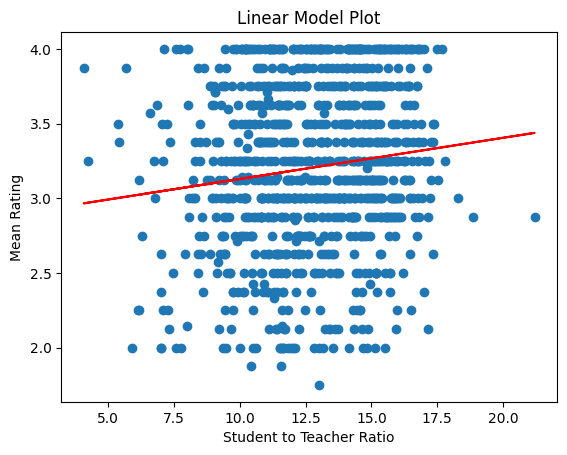

In [28]:
# Regression line
plt.scatter(data.ptr, data.Mean_rating)
plt.plot(x, y_hat, 'r')
plt.xlabel('Student to Teacher Ratio')
plt.ylabel('Mean Rating')
plt.title('Linear Model Plot')
plt.show()

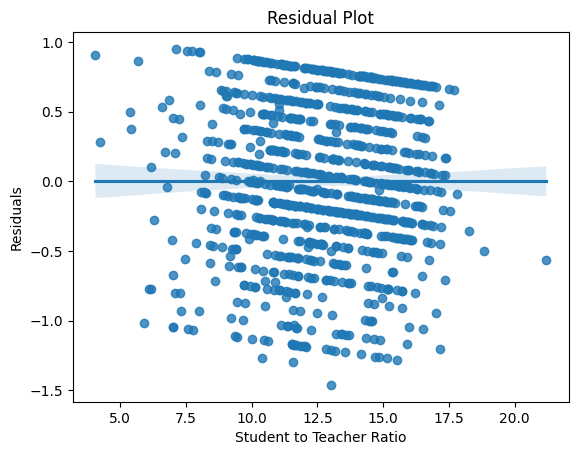

In [21]:
# Plot the residuals
residuals = y - y_hat
plt.figure()
sns.regplot(x = x, y = residuals)
plt.ylabel('Residuals')
plt.xlabel('Student to Teacher Ratio')
plt.title('Residual Plot')
plt.show()


# **Question 5**



In [22]:
# Creating input dataframe
"""
Taking the Total_AP_TAKEN_Prop and FUNDS_PER_STUDENT variables.
"""
input_data = data[['ptr','Total_AP_TAKEN_Prop','FUNDS_PER_STUDENT']]

In [23]:
input_data.head()

,ptr,Total_AP_TAKEN_Prop,FUNDS_PER_STUDENT
0,6.277778,0.00000,13412
1,10.587399,0.00000,10139
2,15.129703,0.03911,9177
3,10.338346,0.00000,9376
4,10.902941,0.00000,11435


In [24]:
# MultiLinear Regression

X = sm.add_constant(input_data)
Y = data.Mean_rating
model_3 = sm.OLS(Y, X).fit()

In [25]:
print("The Model details are listed below: \n",model_3.summary())

The Model details are listed below: 
                             OLS Regression Results                            
Dep. Variable:            Mean_rating   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     19.82
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.72e-12
Time:                        00:59:01   Log-Likelihood:                -788.27
No. Observations:                1020   AIC:                             1585.
Df Residuals:                    1016   BIC:                             1604.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------